<a href="https://colab.research.google.com/github/heewoonjeong/AI8_Study/blob/main/%EC%BD%94%EB%94%A9%EC%9C%BC%EB%A1%9C_XOR_%EB%AC%B8%EC%A0%9C%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np

# 가중치와 바이어스 
# 0과 1중에서 값을 출력하게 설정 
w11= np.array([-2,-2])
w12 = np.array([2, 2])
w2 = np.array([1, 1]) 
b1= 3 
b2 = -1 
b3 = -1

# 퍼셉트론 
def MLP(x, w, b): 
  y = np.sum(w * x) + b 
  if y <= 0:
    return 0 
  else:
    return 1 

#NAND 게이트 
def NAND(x1, x2):
  return MLP(np.array([x1, x2]), w11, b1) 

# OR 게이트 
def OR(x1, x2) :  
  return MLP(np.array([x1, x2]), w12 ,b2) 

# AND 게이트 
def AND(x1, x2): 
  return MLP(np.array([x1, x2]),w2, b3)

# XOR 게이트 
def XOR(x1, x2):
  return AND(NAND(x1, x2), OR(x1, x2))

#x1 값, x2 값을 번갈아 대입하며 최종 값 출력 
for x in [(0, 0),(1, 0) ,(0, 1),(1, 1)]:
  y = XOR(x[0], x[1])
  print("입력 값: " + str(x) + " 출력 값:" + str(y))

입력 값: (0, 0) 출력 값:0
입력 값: (1, 0) 출력 값:1
입력 값: (0, 1) 출력 값:1
입력 값: (1, 1) 출력 값:0


##딥러닝 모델 설계하기 

In [43]:
# 텐서플루 케라스 모델 API함수들 불러옵니다 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# 필요한 라이브러리 불러오기
import numpy as np 

# 깃허브에서 데이터 불러오기 
!git clone https://github.com/taehojo/data.git

# 폐암 수술환자 생존율 예측하기 데이터 불러오기 
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")

X=Data_set[:,0:16] #환자의 진찰 기록을 x로 지정합니다. 
y=Data_set[:,16] # 수술1년후 사망 /생존 여부를 y로 지정합니다 

# 딥러닝 모델의 구조를 결정합니다 
model = Sequential()
model.add(Dense(30, input_dim=16 , activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

#모델을 실행 합니다. 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=5, batch_size =16)

fatal: destination path 'data' already exists and is not an empty directory.
Epoch 1/5
30/30 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.8319
Epoch 2/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8468
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8511


In [44]:
model = Sequential()
model.add(Dense(30, input_dim= 16, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
history = model.fit(X,y, epochs =5, batch_size = 16)

Epoch 1/5
30/30 [==============================] - 0s 2ms/step - loss: 6.7672 - accuracy: 0.1553
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.9006 - accuracy: 0.8255
Epoch 3/5
30/30 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.8255
Epoch 4/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8319
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8468


In [47]:
# 모델 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 깃허브에 준비되 데이터 셋 불러오기
!git clone https://github.com/taehojo/data.git
# 피마 인디언 당뇨병 데이터셋 불러오기 
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

fatal: destination path 'data' already exists and is not an empty directory.


In [48]:
df.head(5) 

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
# 데이터의 컬럼 값이 몇개씩인지 알려줍니다 
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [50]:
# 정보별 특징을 조금더 알고싶으면 describe() 함수 이용합니다 
# count 샘플수 mean 평균 std 표준편차 min최소값 max 최고값 
df.describe() 

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# 각 항목의 상관관계를 가지고 있는지 알고싶다면 corr 입력 
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [52]:
colormap = plt.cm.gist_heat # 그래프의 색상 구성을 정합니다. 
plt.figure(figsize=(12,12)) # 그래프의 크기를 정합니다. 

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

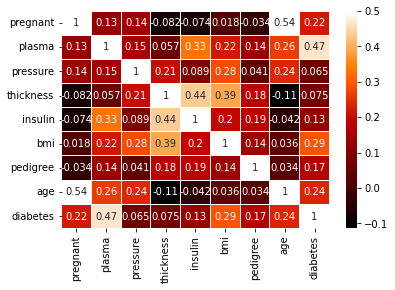

In [53]:
# vmax는 색상의 밝기를 조절하는 인자 , cmap은 미리 정해진 맷플롯립 생상의 설정 값을 불러옵니다 
# 두항목이 전혀 다른 패턴으로 변화하면 0 비슷한 패턴으로 변할수록 1에 가까운 값을 출력합니다.
# 가장 중요한것은 당뇨병 발병여부 diabetes! pregnant~age까지 상관도가 숫자로 표시되어 있고 숫자가 높을 수록 밝은 색상으로 채워져 있습니다.
# plasma ,BMI가 예측하고자 하는 당뇨병과 상관관계가 높다는것을 알수 있습니다.
sns.heatmap(df.corr(), linewidths= 0.1, vmax=0.5, cmap= colormap, linecolor='white', annot= True)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


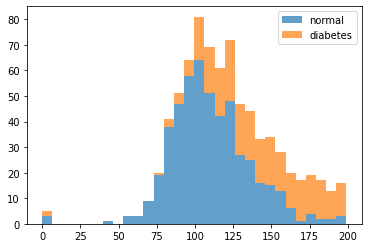

In [61]:
# plasma,BMI와 상관관계가 있는지 hist그램으로 확인 예측모델만드는데 중요한 역활을 한다. 
# 정상과 당뇨여부가 어떻게 분포되는지 확인 
# hist()함수안에 x축을 지정 df안에 plasma칼럼중 diabetes 값이 0인것과 1인것을 구분해 불러게 한다 
# bin은 x축을 몇개의 막대로 쪼개어 보여줄 것인지 정하는 변수 
# barstacked 옵션은 여러 데이터가 쌓여 있는 형태의 막대바를 생성하는 옵션 
# 이름은 각각 normal(정상)과 diabetes(당뇨)로 정했습니다. 
# plasma수치가 높을수록 당뇨인경우가 많음을 알수가있습니다. 
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], 
         bins=30,histtype='barstacked',label=['normal','diabetes'],alpha=0.7)
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


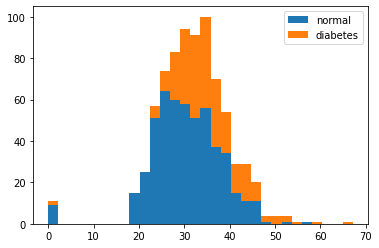

In [63]:
# BMI를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포 하는지 확인 
# BMI 가 높아 질수록 당뇨의 발병률도 함께 증가는 것을 확인 
plt.hist(x=[df.bmi[df.diabetes==0],df.bmi[df.diabetes==1]],bins=30, 
         histtype='barstacked', label=['normal','diabetes'])
plt.legend()

In [56]:
# 텐서플루 케라스 이용해서 예측하기전 iloc[] 사용해서 각각 저장 iloc는 데이터 프레임 에서 대괄호 안에 정하 범위 만큼 가져와 저장 
# 당뇨뺌
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [65]:
# 범우 확인 
X.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [57]:
# 은닉층 하나 추가됨 층과 층을 연결해 주는 model.sumary() 가추가됨 모델3개를 사용 3개의 층을 만듬
# 입력 =8개 activation은 relu Dense는 노드갯수는 크게 의미없음 
# layer 부분은 층과 이름 유형을 나타냄 이름을 만들려면 Dense()층에 name ='층이름'
# output shape 부분은 각층에 몇개의 출력이 발생하는지 나타냄 ,를 사이에두고 괄호의 앞은 행(샘플)의수, 뒤는 열(속성)의 수를 의미
# batch_size에 정한 만큼 입력되므로 딥러닝 모델에서는 이를 특별히 세지 않아 괄호의 앞은 None 으로 표시
# 여덟개의 입력이 첫번째 은닉층을 지나며 12개가 되고 두번째 은닉층을 지나며 여덟개가 되었다가 출력층에서 한개의 출력을 만든다는걸 알수있음
# pram 파라미터 수 즉 총 가중치와 바이어스 수의 합을 나타냄 
# 입력 값 8개가 층안에서 12개의 노드로 분산되므로 가중치가 8x12=96개가 되고 각 노드에 바이어스가 한개씩 있으니 전체 파라미터 수는 96+12+108이됨 
# Trainable params 는 학습을 진행하면서 업데이트된 파라미터 
# Non_trainable params는 업데이트가 되지않은 파라미터 수 전이 학습을 할경우에는 수치 변화있을수 있음 
# 
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation= 'relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid' , name='Dense_3'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


은닉층을 개수를 두개로 한 이유 노드의 개수를 왜 각각 12개와 8개로 했는지 
입력과 출력의 수는 정해져 있지만 은닉층은 몇 층으로 할지 은닉층 안의 노드는 몇개로 할지에 대한 정답은 없습니다. 자신의 프로젝트에 따라 설정해야 합니다 여러번 반복하면서 최적 값을 찾아내는 것이 좋으며 여기서는 임의의 수로 12와 8을 설정했고 설명의 편의성을 위해 두개의 은닉층을 만들었습니다. 직접 노드의 수와 은닉층의 개수를 바꾸어 보면서 더 좋은 정확도가 나오는지 실험해보자 

In [ ]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# 모델 실행
history = model.fit(X,y, epochs =100, batch_size=5)